# Scenario

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

# Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

# Dataset

This is an open source dataset taken from [Kaggle.com](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test)
- __MarketID__: unique identifier for market
- __MarketSize__: size of market area by sales
- __LocationID__: unique identifier for store location
- __AgeOfStore__: age of store in years
- __Promotion__: one of three promotions that were tested
- __Week__: one of four weeks when the promotions were run
- __SalesInThousands__: sales amount for a specific LocationID, Promotion, and week

# A/B Testing

There are seven steps that are generally followed while performing A/B testing - 
1) Understand business objective
2) Set hypothesis testing parameters such as null and alternative hypothesis. Significance level and power of the test
3) Design of experiment, that is, choosing randomization unit and target population
4) Running the experiments and collection of data
5) Validity checks on the collected data
6) Interpret Results
7) Take launch decision based on the results observed

# Step 1 -  Business Objective

The given fast-food business wants to launch new products to stay competitive and we must analyze if three different marketing campaigns have any effect on the weekly sales. Therefore our success metric is `weekly sales` and the experiment is randomized at `market level`

# Step 2 - Hypothesis Testing

Now we must decide on the paramters of hypothesis testing. Since we are tesing difference in sales between three marketing campaigns.

Null Hypothesis is: There is no difference between mean weekly sales among the three campaigns
Alternative Hypothesis is: There is a difference between mean weekly sales among the three campaigns

We keep significance at 5% and the power of test at 80%

# Step 3 - Experiment Design 

The target audience for our experiment is the customers who consume fast-food and the experiment is randomized at market level

# Step 4 - Run the Experiment

This step has been taken care of and we have the data from the experiement. Now we move on to analyze this data and interpret the results

# Step 5 - Validity Checks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/marketing_campaigns_data.csv")
print(df.shape)
df.head()

(548, 7)


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [4]:
df.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df2 = df.groupby(['MarketID', 'MarketSize'], as_index=False).aggregate(
    {'Promotion': 'count', 'SalesInThousands': 'mean'})

df2.sort_values(by = 'SalesInThousands', ascending = False, inplace=True)

df2.rename(columns = {'Promotion': 'Count', 'SalesInThousands': 'MeanSalesInThousands'}, inplace = True)
df2

,MarketID,MarketSize,Count,MeanSalesInThousands
2,3,Large,88,84.971705
1,2,Small,24,61.761250
3,4,Small,36,54.508056
9,10,Large,80,53.776250
8,9,Medium,40,52.940750
7,8,Medium,48,48.952917
4,5,Medium,60,48.838000
6,7,Medium,60,44.475333
5,6,Medium,60,36.397500
0,1,Medium,52,35.101731


## Explore data at promotion level

In [7]:
count_df = df['Promotion'].value_counts().sort_index().to_frame('Count').reset_index()
count_df.columns = ['Promotion', 'Count']

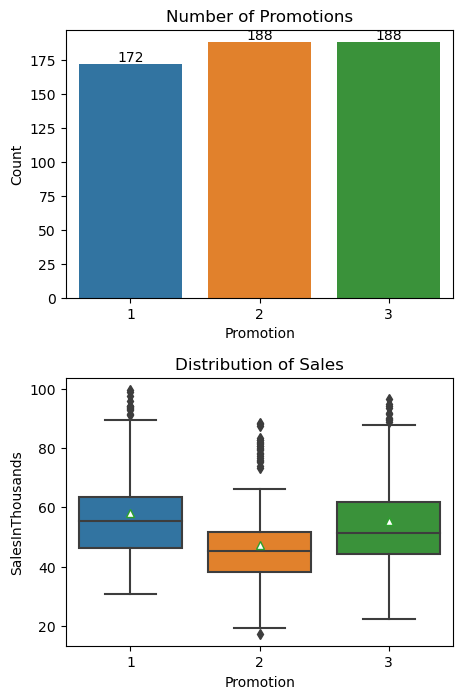

In [8]:
# create two subplots. One for bar plot and another one for box plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (5, 8))

# plotting count for each promotion
sns.barplot(y = 'Count', x = 'Promotion', data = count_df, ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Number of Promotions')

# plotting sales in each promotion
sns.boxplot(y = 'SalesInThousands', x = 'Promotion', data = df,
            showmeans = True, meanprops = {'markerfacecolor': 'white'}, ax = ax2)
ax2.set_title('Distribution of Sales')
fig.subplots_adjust(hspace = 0.3)

We can see that the distribution of sales with promotions 1 and 3 is higher

## Explore data at market level

In [9]:
count_df2 = df.groupby(['MarketSize', 'Promotion'])['MarketID'].count().reset_index()
count_df2.columns = ['MarketSize', 'Promotion', 'Count']
count_df2

,MarketSize,Promotion,Count
0,Large,1,56
1,Large,2,64
2,Large,3,48
3,Medium,1,96
4,Medium,2,108
5,Medium,3,116
6,Small,1,20
7,Small,2,16
8,Small,3,24


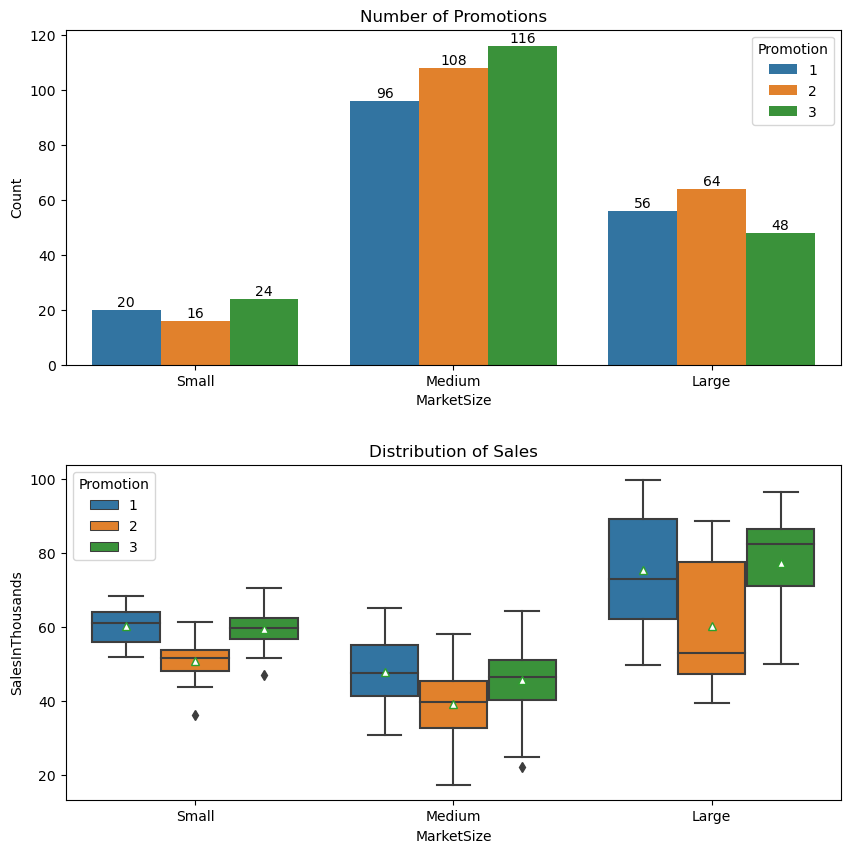

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))

sns.barplot(y = 'Count', x = 'MarketSize', hue = 'Promotion', data = count_df2,
            order = ['Small', 'Medium', 'Large'], ax = ax1)

for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Number of Promotions')

sns.boxplot(y = 'SalesInThousands', x = 'MarketSize', hue = 'Promotion', data = df,
            order = ['Small', 'Medium', 'Large'], showmeans = True,
            meanprops = {'markerfacecolor': 'white'}, ax = ax2)

ax2.set_title('Distribution of Sales')
fig.subplots_adjust(hspace = 0.3)

Evidently, a similar pattern is observed across markets, which provides preliminary indications of the future direction of the analysis.

Specifically, Promotions 1 and 3 demonstrate an increase in the mean sales, whereas Promotion 2 exhibits comparatively lower effectiveness.

Nonetheless, drawing conclusions solely based on boxplots may lack credibility. Therefore, to substantiate our findings, an ANOVA test can be conducted to determine the statistical significance of differences in means among promotions.

Prior to conducting the ANOVA test, it is necessary to satisfy three assumptions regarding the data:

1) All groups must be independent of each other, and the data should not be based on repeated measurements.

2) The responses, i.e., the data, should follow a normal distribution.

3) The variances of all groups must be comparable, i.e., approximately equal.

For the purpose of simplicity, we have made the assumption that the data follows a normal distribution. However, if this assumption is not met, an alternative statistical test, known as the Kruskal-Wallis test, can be employed. This test may be considered as an equivalent of the ANOVA test, but without the normal distribution assumption for the data.

# Step 6 - Interpret Results 

## At Promotion Level

In [11]:
p1_sale = df[df['Promotion'] == 1]['SalesInThousands']
p2_sale = df[df['Promotion'] == 2]['SalesInThousands']
p3_sale = df[df['Promotion'] == 3]['SalesInThousands']

In [12]:
import scipy.stats as stats

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [13]:
stats.f_oneway(p1_sale, p2_sale, p3_sale)

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

The results of the statistical test reveal an F-statistic value of 21.95, and a corresponding p-value that is extremely low, approaching zero. This outcome indicates the presence of a notable impact of promotional activities on sales revenue.

## At Market Level

In [14]:
df['market-promotion'] = df['MarketSize'].astype(str) + '-' + df['Promotion'].astype(str)

large1 = df.loc[(df['market-promotion']=='Large-1'), 'SalesInThousands']
large2 = df.loc[(df['market-promotion']=='Large-2'), 'SalesInThousands']
large3 = df.loc[(df['market-promotion']=='Large-3'), 'SalesInThousands']

medium1 = df.loc[(df['market-promotion']=='Medium-1'), 'SalesInThousands']
medium2 = df.loc[(df['market-promotion']=='Medium-2'), 'SalesInThousands']
medium3 = df.loc[(df['market-promotion']=='Medium-3'), 'SalesInThousands']

small1 = df.loc[(df['market-promotion']=='Small-1'), 'SalesInThousands']
small2 = df.loc[(df['market-promotion']=='Small-2'), 'SalesInThousands']
small3 = df.loc[(df['market-promotion']=='Small-3'), 'SalesInThousands']

In [15]:
stats.f_oneway(small1, small2, small3)

F_onewayResult(statistic=16.57648112557373, pvalue=2.115939995841426e-06)

In [16]:
stats.f_oneway(medium1, medium2, medium3)

F_onewayResult(statistic=29.68813375084531, pvalue=1.5197404971604578e-12)

In [17]:
stats.f_oneway(large1, large2, large3)

F_onewayResult(statistic=21.44511115677835, pvalue=5.261567483455427e-09)

The results of these tests suggests that there exists a statistically significant difference in the weekly sales figures among all the markets.

# Step 7 - Launch Decision

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Tukey's Honest Significant Difference (HSD) test is a post hoc test commonly used to assess the significance of differences between pairs of group means. Tukey HSD is often a follow up to one-way ANOVA, when the F-test has revealed the existence of a significant difference between some of the tested groups.

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


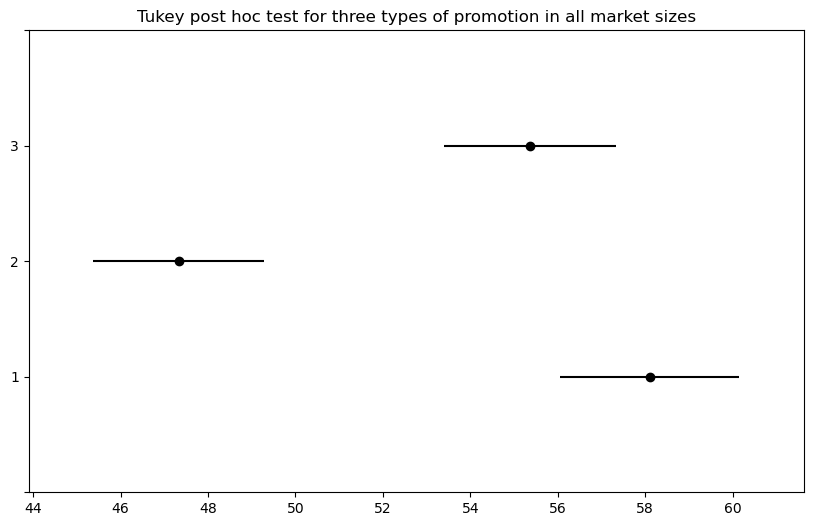

In [19]:
tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Promotion'], alpha=0.05)

tukey.plot_simultaneous()

plt.title("Tukey post hoc test for three types of promotion in all market sizes")
tukey.summary()

The Tukey post hoc test indicates that there is a significant difference between promotion 2 and others. However, there is no difference between 1 and 3.

## Small Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-9.3519,0.0,-13.683,-5.0208,True
1,3,-0.6483,0.9161,-4.5579,3.2612,False
2,3,8.7035,0.0,4.5359,12.8712,True


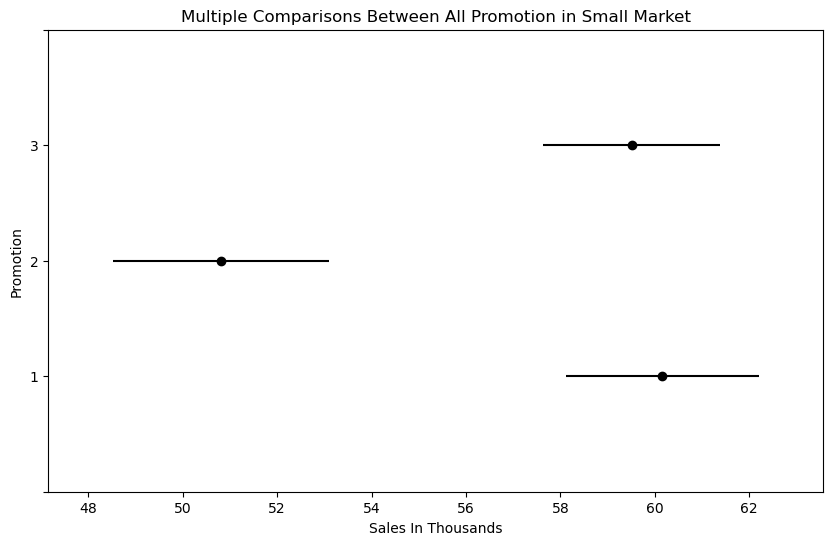

In [20]:
small = df.loc[df['MarketSize'] == 'Small', :]

tukey_small = pairwise_tukeyhsd(endog=small['SalesInThousands'], groups=small['Promotion'], alpha=0.05)
tukey_small.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Small Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_small.summary()

## Medium Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.5583,0.0,-11.3107,-5.8058,True
1,3,-2.2037,0.1356,-4.9111,0.5037,False
2,3,6.3545,0.0,3.7307,8.9783,True


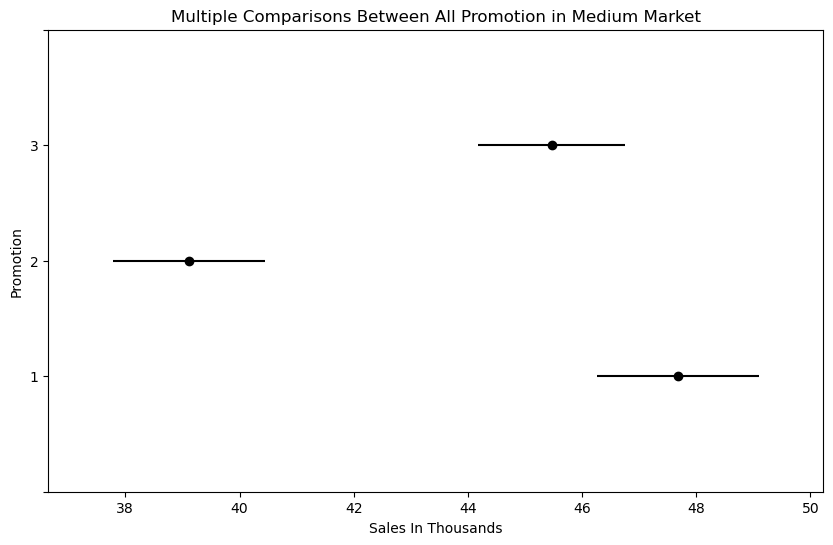

In [21]:
medium = df.loc[df['MarketSize'] == 'Medium', :]

tukey_medium = pairwise_tukeyhsd(endog=medium['SalesInThousands'], groups=medium['Promotion'], alpha=0.05)
tukey_medium.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Medium Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_medium.summary()  

## Large Market Size

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-14.9139,0.0,-21.5279,-8.2998,True
1,3,1.9681,0.79,-5.1418,9.078,False
2,3,16.8819,0.0,9.9802,23.7837,True


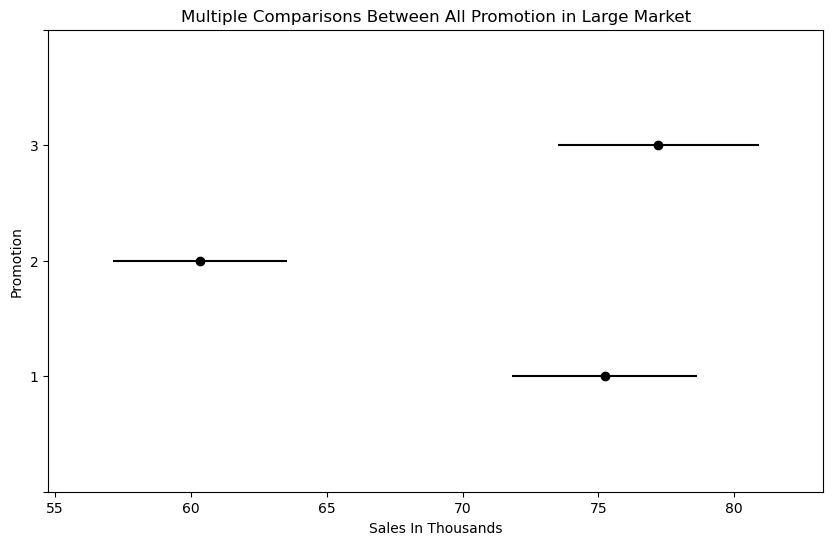

In [22]:
large = df.loc[df['MarketSize'] == 'Large', :]

tukey_large = pairwise_tukeyhsd(endog=large['SalesInThousands'], groups=large['Promotion'], alpha=0.05)  

tukey_large.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Large Market")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

tukey_large.summary() 

The outcomes of the ANOVA and post hoc tests conducted on markets of varying sizes, i.e., small, medium, and large, have yielded similar results to those observed in the overall analysis.

# Conclusion

The statistical analyses reveal that promotional activities 1 and 3 generate higher average revenues than promotion 2 in all market sizes. As a result, the organization may consider utilizing promotions 1 and 3 as part of its forthcoming marketing campaigns.